# Case Study 9-Unsuperwised Learning

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.) Read the dataset

In [2]:
data=pd.read_csv('Wine.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There is no need of preprocessing in the dataset

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Since this is an unlabelled data we will use unsupervised learning techniques to find patterns, ie, to group the data into different classes of wine.

# 2.) Try out different clustering models

## KMeans clustering

In [4]:
from sklearn.cluster import KMeans
#print within cluster sum of squares
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

17592296.383508474
4543749.614531863
2370689.6867829696
1331903.0622637176
916379.1871539167
648422.2834974247
412303.82825080125
323211.55263465457
270954.9292415374
217887.3785603329


# 3.) Find the optimum number of clusters in each model and create the model with the optimum number of clusters

## Use the Elbow-Method to find optimum number of clusters for KMeans

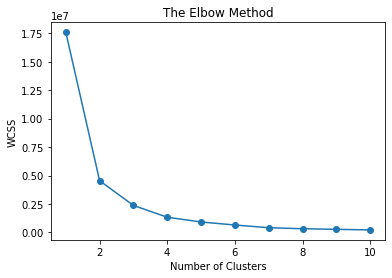

In [5]:
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, it is clear that the optimum number of clusters is 3.

In [6]:
#k-means with number  of clusters=3
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
labels=kmeans.fit_predict(data)
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [7]:
#silhouette_score to measure the correctness in clustering
from sklearn.metrics import silhouette_score
sil_rawdata=silhouette_score(data,labels)
sil_rawdata

0.571138193786884

### KMeans clustering after standard scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#pipeline for sequence of function
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(scaler,kmeans)
data_sc=pipe.fit(data)
labels_sc = pipe.predict(data)
print(labels_sc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### KMeans clustering after Normalization

In [9]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
#pipeline for sequence of function
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(norm,kmeans)
pipe.fit(data)
labels_nm = pipe.predict(data)
print(labels_nm)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 1 2 2 2 2 1 0 1 2 2
 0 1 1 1 2 1 1 0 2 2 2 1 2 2 0 0 2 2 2 1 1 2 1 2 2 1 2 2 1 1 2 1 2 2 1 2 2
 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2
 2 1 1 1 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Comparing the KMeans clustering before and after scaling, normalization 

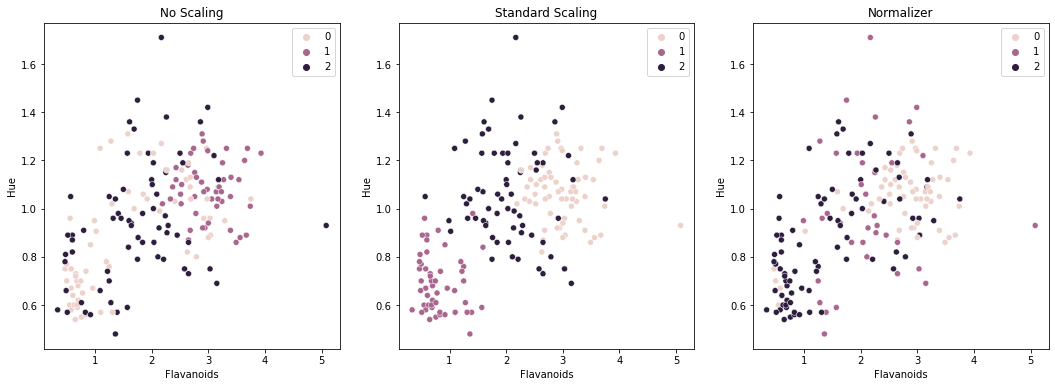

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))

sns.scatterplot(data=data,x='Flavanoids',y='Hue',hue=labels,ax=ax[0]) 
sns.scatterplot(data=data,x='Flavanoids',y='Hue',hue=labels_sc,ax=ax[1]) 
sns.scatterplot(data=data,x='Flavanoids',y='Hue',hue=labels_nm,ax=ax[2]) 
ax[0].set_title('No Scaling')
ax[1].set_title('Standard Scaling')
ax[2].set_title('Normalizer')
plt.show()

Standard scaling resulted in better clustering

## Hierarchical Clustering

#### Dendrogram to find optimal number of clusters

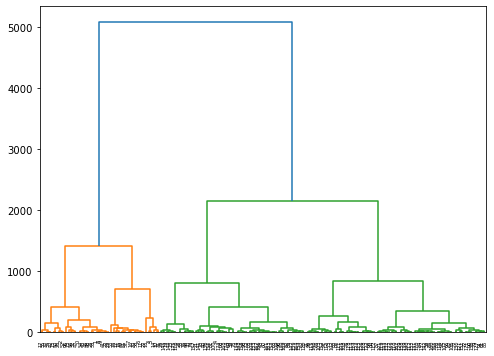

In [11]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked = linkage(data,method='ward')
plt.figure(figsize=(8,6))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

As per this dendrogram, there are two clusters by taking longest line with no horizontal cutting. Thus numer of clusters is two.

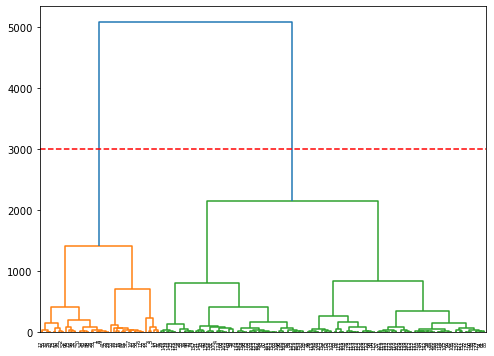

In [12]:
plt.figure(figsize=(8,6))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(3000,0,3000,colors='r',linestyles='dashed')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_hc=cluster.fit_predict(data)
print(labels_hc)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
silhouette_score(data, labels_hc, metric='euclidean')

0.6587292996216912

Hierarchical clustering has high silhouette score as compared to KMeans clustering

## Hierarchical clustering after Standard scaling

In [15]:
scaler=StandardScaler()
scaled_data= scaler.fit_transform(data)
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_hs=cluster.fit_predict(scaled_data)
print(labels_hs)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Hierarchical clustering after Normalization

In [16]:
norm = Normalizer()
norm_data = norm.fit_transform(data)
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labels_hn=cluster.fit_predict(norm_data)
print(labels_hn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Comparing the Hierarchicalclustering before and after scaling, normalization

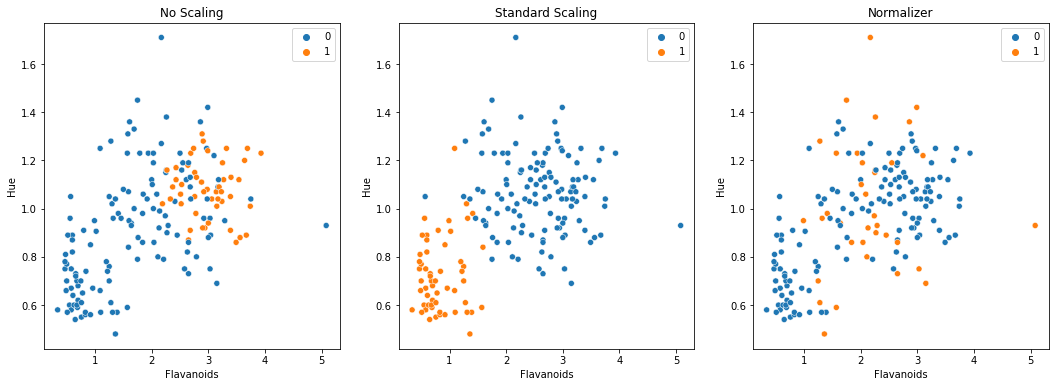

In [17]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))

sns.scatterplot(data=data,x='Flavanoids',y='Hue',hue=labels_hc,ax=ax[0]) 
sns.scatterplot(data=data,x='Flavanoids',y='Hue',hue=labels_hs,ax=ax[1]) 
sns.scatterplot(data=data,x='Flavanoids',y='Hue',hue=labels_hn,ax=ax[2]) 
ax[0].set_title('No Scaling')
ax[1].set_title('Standard Scaling')
ax[2].set_title('Normalizer')
plt.show()

Standard scaling has better result in Hierarchical clustering.

# PCA for dimensionality reduction

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

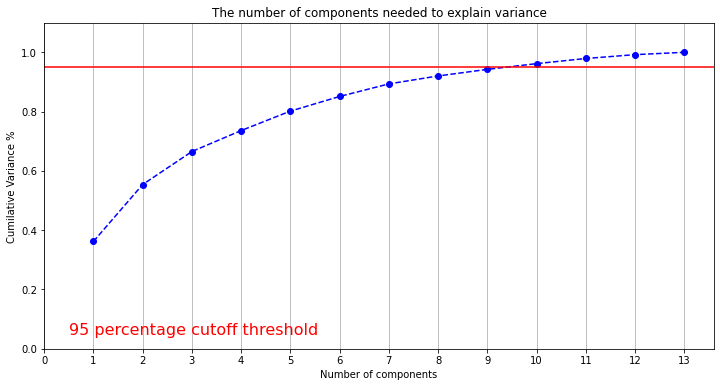

In [18]:
from sklearn.decomposition import PCA
pca=PCA().fit(scaled_data)
plt.rcParams['figure.figsize']=(12,6)
fig,ax=plt.subplots()
xi=np.arange(1,14,step=1)
y=np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi,y,marker='o',linestyle='--',color='b')
plt.xlabel("Number of components")
plt.xticks(np.arange(0,14,step=1))
plt.ylabel('Cumilative Variance %')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95,color='r',linestyle='-')
plt.text(0.5,0.05,'95 percentage cutoff threshold',color='red',fontsize=16)
ax.grid(axis='x')
plt.show()

We can take number of components as 10. But we cannot plot the data with 10 components. We can take number of components=2 with less than 60% cutoff threshold

In [19]:
pca = PCA(n_components = 2)
pca.fit(data)
x_pca = pca.transform(data)

### Plotting the clusters formed by KMeans clustering


Text(0, 0.5, 'Second Principal Component')

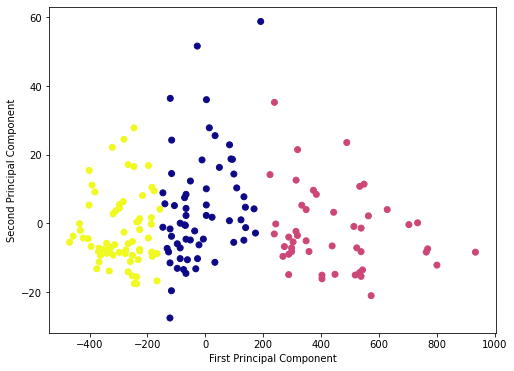

In [20]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = labels, cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Plotting clusters formed by Hierarchical Clustering

Text(0, 0.5, 'Second Principal Component')

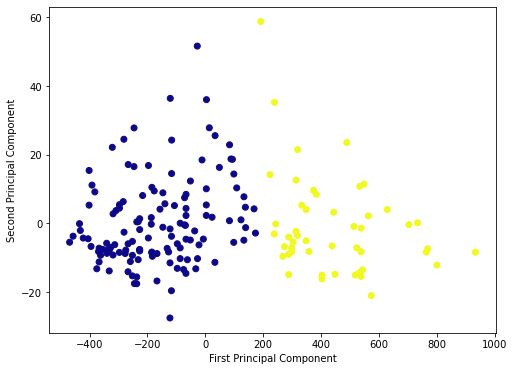

In [21]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = labels_hc, cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')